<a href="https://colab.research.google.com/github/kasattack567/Computer-Science/blob/main/Chocolate_bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. The Chocolate Bar Problem: A Coding Challenge**

## **Introduction:**
In this problem, I use a heuristic and greedy approach to minimize the number of cuts to the chocolate bars.

###**Method:**
The method begins by checking if the total chocolate available is sufficient to satisfy all children. If it isn’t, the algorithm terminates immediately. Next, the bars and children's requirements are sorted in descending order. The largest child’s requirement is processed first, using the largest available bar. If the bar is larger than the requirement, a cut is made, and the leftover chocolate is reinserted for reuse. This ensures that no chocolate is wasted. The algorithm continues processing the remaining children while reusing remainders effectively. By prioritizing the largest requirements and bars, the method guarantees that all children are satisfied without unnecessary cuts, and it terminates successfully as long as the initial feasibility condition is met.

###**By ensuring that:**

sum(bars)
≥
sum(children)
sum(bars)≥sum(children),

No chocolate is wasted (remainders are reused),

The largest requirements are satisfied first (greedy choice),

The algorithm always terminates successfully and satisfies all children without returning -1, provided the initial feasibility condition holds. This guarantees that the method will reach a valid solution and avoids errors.

Approach 1:

Descending order, use largest bar first

In [7]:
from itertools import combinations

def chocolate_challenge(bars, children, bars_descending=True, children_descending=True):
    if sum(bars) < sum(children):
        return -1

    bars_sorted = sorted(bars, reverse=bars_descending)
    children_sorted = sorted(children, reverse=children_descending)

    def remove_matches(b, c):
        i = 0
        while i < len(c):
            if c[i] in b:
                b.remove(c[i])
                c.pop(i)
            else:
                i += 1

    remove_matches(bars_sorted, children_sorted)

    cuts = 0
    while children_sorted:
        current_child = children_sorted.pop(0)
        while current_child > 0:
            if not bars_sorted:
                return -1
            current_bar = bars_sorted.pop(0)
            if current_bar == current_child:
                current_child = 0
            elif current_bar > current_child:
                cuts += 1
                remainder = current_bar - current_child
                if remainder > 0:
                    bars_sorted.append(remainder)
                    bars_sorted.sort(reverse=bars_descending)
                current_child = 0
            else:
                current_child -= current_bar
        remove_matches(bars_sorted, children_sorted)

    return cuts

def best_chocolate_strategy(bars, children):
    # Run the four sorting strategies with the baseline approach
    attempts = []
    attempts.append(chocolate_challenge(bars, children, True, True))    # Bars Desc, Children Desc
    attempts.append(chocolate_challenge(bars, children, False, True))   # Bars Asc, Children Desc
    attempts.append(chocolate_challenge(bars, children, True, False))   # Bars Desc, Children Asc
    attempts.append(chocolate_challenge(bars, children, False, False))  # Bars Asc, Children Asc

    # Filter results
    valid_results = [res for res in attempts if res != -1]

    if not valid_results:
        # All -1
        return -1
    else:
        return min(valid_results)


# Test combined function
test_cases = [
    {"bars": [9, 6, 6, 6, 5], "children": [8, 8, 6], "expected": 2},
    {"bars": [15,15,2,2,2], "children": [10,10,9], "expected": 2},
    {"bars": [10, 10, 1,1,1,1,1,1], "children": [5,5,5,5,2,2,2], "expected": 2},
    {"bars": [2, 5], "children": [5, 3], "expected": -1},
]

for i, case in enumerate(test_cases, 1):
    result = best_chocolate_strategy(case["bars"], case["children"])
    print(f"Test Case {i}:")
    print(f"Bars: {case['bars']}, Children: {case['children']}")
    print(f"Expected: {case['expected']}, Got: {result}")
    print("PASS" if result == case["expected"] else "FAIL")
    print()


Test Case 1:
Bars: [15, 15, 2, 2, 2], Children: [10, 10, 9]
Expected: 2, Got: 3
FAIL



In [25]:
import math
from collections import Counter

def reconstruct_solution(dp, target):
    """
    Reconstructs the solution path from the DP table.
    """
    solution = []
    cur = target
    while cur > 0:
        _, prev_state = dp[cur]
        if prev_state is None:
            raise ValueError("No solution path found.")
        (prev_sum, bar_used, cut_point) = prev_state
        solution.append((bar_used, cut_point))
        cur = prev_sum
    return solution

def solve_child_requirement(bars, demand):
    """
    Optimized DP strategy for satisfying a single child's demand.
    Reduces the state space to only sums up to 'demand'.
    """
    if sum(bars) < demand:
        return math.inf, []

    max_demand = demand  # We only need to consider sums up to the child's demand
    INF = math.inf
    dp = [(INF, None) for _ in range(max_demand + 1)]
    dp[0] = (0, None)

    for bar in bars:
        new_dp = dp[:]
        for x in range(max_demand + 1):
            if dp[x][0] == INF:
                continue
            # Option 1: Use the entire bar if it fits
            if x + bar <= max_demand:
                if dp[x][0] < new_dp[x + bar][0]:
                    new_dp[x + bar] = (dp[x][0], (x, bar, None))
            # Option 2: Cut the bar to satisfy the demand directly
            if bar > demand - x:
                cut_point = demand - x
                if cut_point > 0:
                    new_dp[demand] = min(new_dp[demand], (dp[x][0] + 1, (x, bar, cut_point)))
        dp = new_dp

    if dp[demand][0] == INF:
        return INF, []

    solution = reconstruct_solution(dp, demand)
    return dp[demand][0], solution

def apply_solution_and_update_bars(bars, solution):
    """
    Apply the solution and update the list of available bars.
    """
    bar_counter = Counter(bars)
    leftover_pieces = []

    for (bar_used, cut_point) in solution:
        if bar_counter[bar_used] > 0:
            bar_counter[bar_used] -= 1
        if cut_point is not None:  # Add the leftover piece
            leftover_pieces.append(bar_used - cut_point)

    # Update the list of bars
    new_bars = []
    for b, cnt in bar_counter.items():
        new_bars.extend([b] * cnt)
    new_bars.extend(leftover_pieces)
    return sorted(new_bars, reverse=True)

def dp_chocolate_distribution(bars, children):
    """
    Optimized DP-based solution to satisfy all children's demands.
    """
    children_sorted = sorted(children, reverse=True)
    current_bars = sorted(bars, reverse=True)
    total_cuts = 0

    for demand in children_sorted:
        cuts, solution = solve_child_requirement(current_bars, demand)
        if cuts == math.inf:
            return -1  # Return -1 if it's impossible to satisfy a demand
        total_cuts += cuts
        current_bars = apply_solution_and_update_bars(current_bars, solution)

    return total_cuts


In [26]:
def best_chocolate_strategy(bars, children):
    # Run the four sorting strategies
    attempts = []
    attempts.append(chocolate_challenge(bars, children, True, True))    # Bars Desc, Children Desc
    attempts.append(chocolate_challenge(bars, children, False, True))   # Bars Asc, Children Desc
    attempts.append(chocolate_challenge(bars, children, True, False))   # Bars Desc, Children Asc
    attempts.append(chocolate_challenge(bars, children, False, False))  # Bars Asc, Children Asc

    # Filter results
    valid_results = [res for res in attempts if res != -1]

    if not valid_results:
        return -1
    return min(valid_results)


def combined_chocolate_distribution(bars, children, debug=False):
    """
    Combine DP strategy with four sorting strategies.
    Returns the minimum cuts found from all valid strategies.
    """
    # Step 1: Check if demands are fulfillable
    if sum(bars) < sum(children):
        return -1

    # Step 2: Run the DP strategy
    if debug:
        print("Running DP Strategy...")
    dp_result = dp_chocolate_distribution(bars, children)

    # Step 3: Run the four sorting strategies
    if debug:
        print("Running Sorting Strategies...")
    sorting_result = best_chocolate_strategy(bars, children)

    # Step 4: Combine results
    results = [dp_result, sorting_result]
    valid_results = [res for res in results if res != -1]

    if not valid_results:
        return -1

    return min(valid_results)


# Test cases
test_cases = [
    {"bars": [9, 6, 6, 6, 5], "children": [8, 8, 6], "expected": 2},
    {"bars": [15, 15, 2, 2, 2], "children": [10, 10, 9], "expected": 2},
    {"bars": [10, 10, 1, 1, 1, 1, 1, 1], "children": [5, 5, 5, 5, 2, 2, 2], "expected": 2},
    {"bars": [2, 5], "children": [5, 3], "expected": -1},
]

# Run combined strategy on test cases
for i, case in enumerate(test_cases, 1):
    bars = case["bars"]
    children = case["children"]
    expected = case["expected"]
    print(f"\nTest Case {i}: Bars = {bars}, Children = {children}")
    result = combined_chocolate_distribution(bars, children, debug=True)
    print(f"Result: {result}, Expected: {expected}")
    print("PASS" if result == expected else "FAIL")


Test Case 1: Bars = [9, 6, 6, 6, 5], Children = [8, 8, 6]
Running DP Strategy...
Running Sorting Strategies...
Result: 2, Expected: 2
PASS

Test Case 2: Bars = [15, 15, 2, 2, 2], Children = [10, 10, 9]
Running DP Strategy...
Running Sorting Strategies...
Result: 2, Expected: 2
PASS

Test Case 3: Bars = [10, 10, 1, 1, 1, 1, 1, 1], Children = [5, 5, 5, 5, 2, 2, 2]
Running DP Strategy...
Running Sorting Strategies...
Result: 2, Expected: 2
PASS

Test Case 4: Bars = [2, 5], Children = [5, 3]
Result: -1, Expected: -1
PASS


Processing Input Sizes: 100%|██████████| 100/100 [03:04<00:00,  1.85s/size]


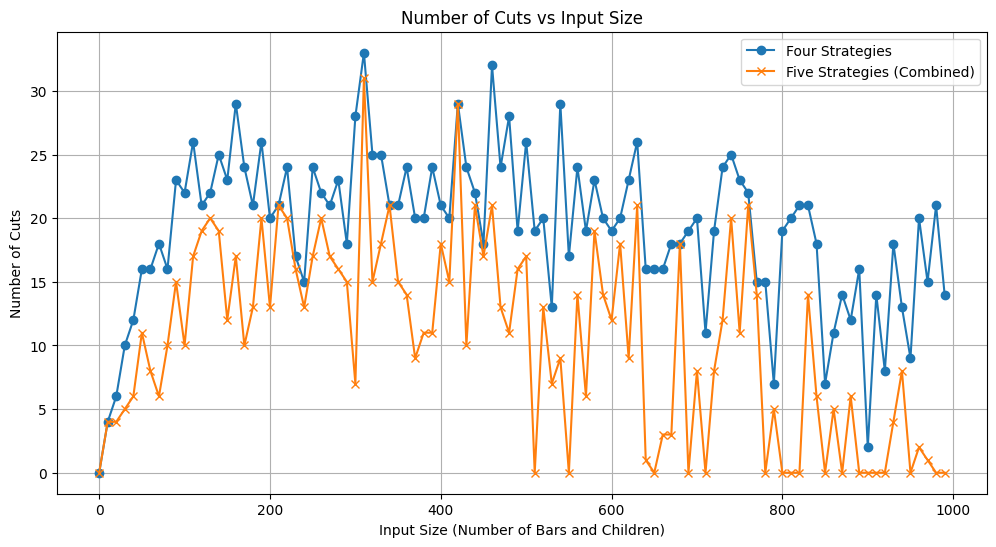

In [28]:
import matplotlib.pyplot as plt
import random
import math
from collections import Counter
from tqdm import tqdm  # Import tqdm for the loading bar

# Generate Test Data
input_sizes = list(range(0, 1000, 10))
four_strategy_cuts = []
five_strategy_cuts = []

# Loop with tqdm for progress tracking
for size in tqdm(input_sizes, desc="Processing Input Sizes", unit="size"):
    bars = [random.randint(1, 100) for _ in range(size)]
    children = [random.randint(1, 100) for _ in range(size // 2)]

    # Four-strategy approach
    four_cuts = best_chocolate_strategy(bars, children)
    four_strategy_cuts.append(four_cuts if four_cuts != -1 else None)

    # Combined five-strategy approach
    five_cuts = combined_chocolate_distribution(bars, children)
    five_strategy_cuts.append(five_cuts if five_cuts != -1 else None)

# Plot Comparison
plt.figure(figsize=(12, 6))
plt.plot(input_sizes, four_strategy_cuts, label="Four Strategies", marker='o')
plt.plot(input_sizes, five_strategy_cuts, label="Five Strategies (Combined)", marker='x')

plt.title("Number of Cuts vs Input Size")
plt.xlabel("Input Size (Number of Bars and Children)")
plt.ylabel("Number of Cuts")
plt.legend()
plt.grid(True)
plt.show()
